In [1]:
import numpy as np
import tensorflow as tf
import cv2
from PIL import Image

2023-02-08 16:59:14.140355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 16:59:14.292680: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-08 16:59:14.292712: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-08 16:59:15.144479: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="../facemask/model_fp16.tflite")
interpreter.allocate_tensors()


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [ ]:
def load_labels(filename):
  with open(filename, 'r') as f:
    return [line.strip() for line in f.readlines()]

In [3]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [33]:
image_path1 = '../facemask/2083.jpg'
image_path2= '../facemask/real_01035.jpg'
img1 = cv2.imread(image_path1)
img2 = cv2.imread(image_path2)
img1 = cv2.resize(img1,(224,224))
img2 = cv2.resize(img2,(224,224))

In [34]:
input_shape = input_details[0]['shape']
floating_model = input_details[0]['dtype'] == np.float32
input_tensor1 = np.array(np.expand_dims(img1,0), dtype=np.float32)
input_tensor2 = np.array(np.expand_dims(img2,0), dtype=np.float32)

In [46]:
if floating_model:
    input_tensor1 = np.array(np.expand_dims(img1,0), dtype=np.float32)

In [51]:
def load_labels(filename):
  with open(filename, 'r') as f:
    return [line.strip() for line in f.readlines()]

In [52]:
testimg = Image.open('../facemask/2083.jpg')
testimg1 = Image.open('../facemask/real_01035.jpg')

In [59]:
#set the tensor to point to the input data to be inferred
input_index = interpreter.get_input_details()[0]["index"]
interpreter.set_tensor(input_index,input_tensor1)#Run the inference
interpreter.invoke()
output_details = interpreter.get_output_details()

In [60]:
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.8281668  0.17183323]]


In [42]:
result = np.squeeze(output_data)
top_k = result.argsort()[-5:][::-1]
labels = '../facemask/labels.txt'
labels = load_labels(labels)

0.828167: Mask


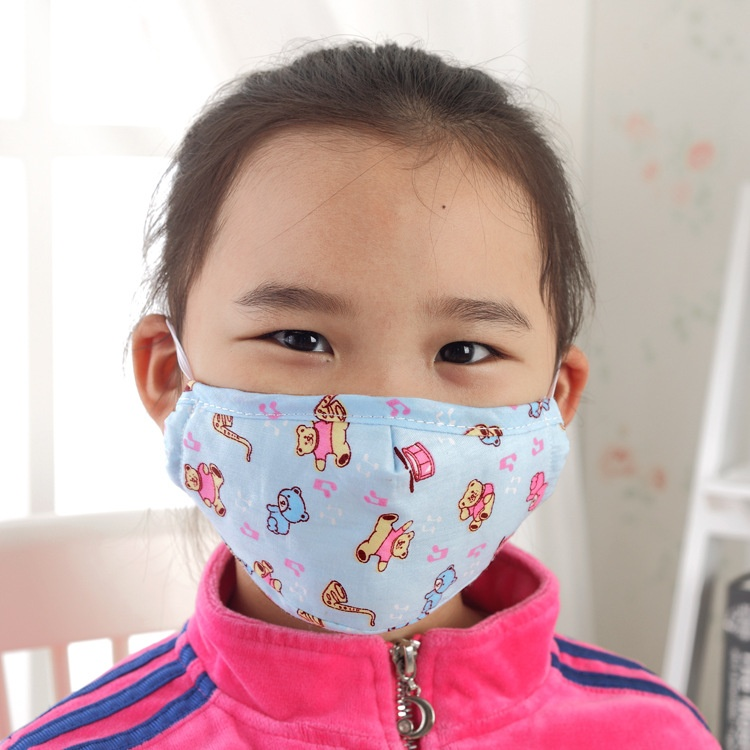

0.171833: Non Mask


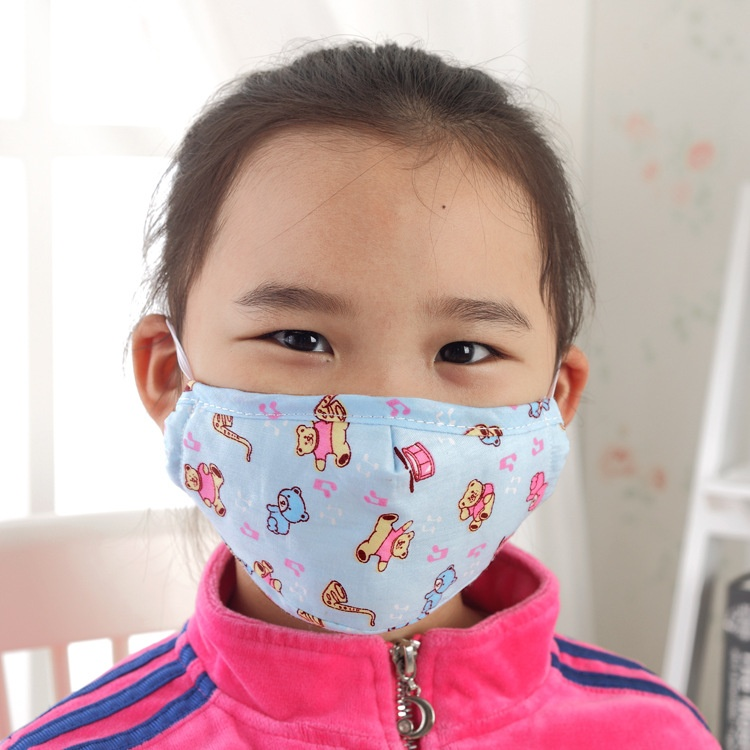

In [58]:
for i in top_k:
    if floating_model:
      print('{:08.6f}: {}'.format(float(result[i]), labels[i]))
      display(testimg)
    else:
      print('{:08.6f}: {}'.format(float(result[i] / 255.0), labels[i]))
      display(testimg)

In [53]:
if floating_model:
    input_tensor2 = np.array(np.expand_dims(img2,0), dtype=np.float32)

In [61]:
interpreter.set_tensor(input_index,input_tensor2)#Run the inference
interpreter.invoke()
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.5223161 0.4776839]]


In [62]:
result = np.squeeze(output_data)
top_k = result.argsort()[-5:][::-1]

0.522316: Mask


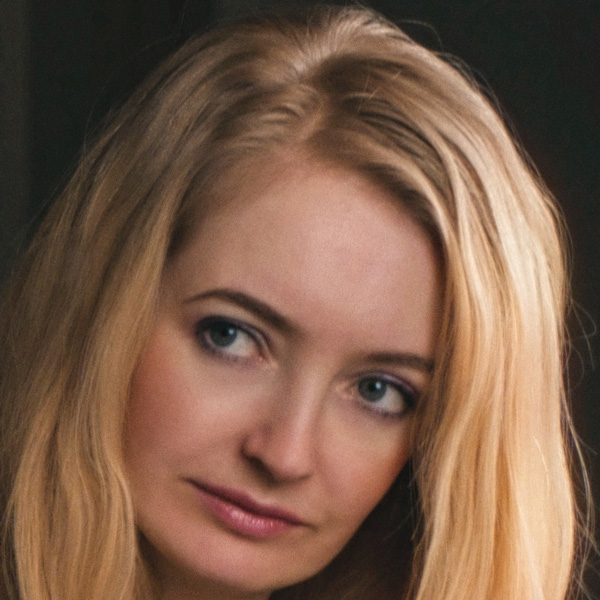

0.477684: Non Mask


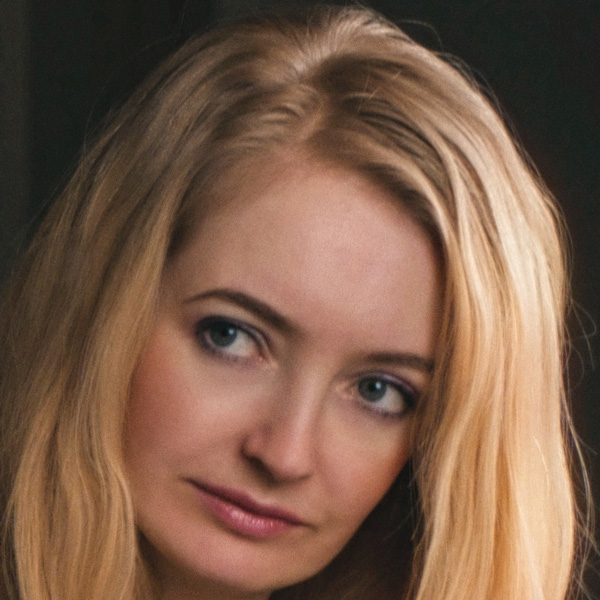

In [63]:
for i in top_k:
    if floating_model:
      print('{:08.6f}: {}'.format(float(result[i]), labels[i]))
      display(testimg1)
    else:
      print('{:08.6f}: {}'.format(float(result[i] / 255.0), labels[i]))
      display(testimg1)